<b>Data mining project - 2020/21</b><br>
<b>Authors</b>: [Alexandra Bradan](https://github.com/alexandrabradan), [Marianna Abbattista](https://github.com/Mariabba), [Eleonora Cocciu](https://github.com/eleonoracocciu) and [Dafina Leva](https://github.com/dafina-95)<br>
<b>Python version</b>: 3.x<br>
<b>Last update: 20/11/2020<b>

In [1]:
%matplotlib inline

# general libraries
import sys
import math
import collections
import missingno as msno
from pylab import MaxNLocator
from collections import defaultdict

# pandas libraries
import pandas as pd
from pandas import DataFrame
from pandas.testing import assert_frame_equal

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# numpy libraries
import numpy as np
from numpy import std
from numpy import mean
from numpy import percentile

# scipy libraries
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import normaltest

# sklearn libraries
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer  # explicitly require this experimental feature
from sklearn.impute import IterativeImputer

In [2]:
data_directory = "../../../data/"
plot_directory = "../../../plots/DataUnderstanding/"
TR_file = data_directory + "Train_HR_Employee_Attrition.csv"
TS_file = data_directory + "Test_HR_Employee_Attrition.csv"
impunted_TR_file = data_directory + "Impunted_Train_HR_Employee_Attrition.csv"
clean_TR_file = data_directory + "Cleaned_Train_HR_Employee_Attrition.csv"
clean_norm_TR_file = data_directory + "Cleaned_Normalized_Train_HR_Employee_Attrition.csv"
num_norm_TR_file = data_directory + "Numerical_Normalized_Train_HR_Employee_Attrition.csv"
cat_normTR_file = data_directory + "Categorical_Normalized_Train_HR_Employee_Attrition.csv"

In [3]:
df_impunted = pd.read_csv(impunted_TR_file)
df_cleaned = pd.read_csv(clean_TR_file)
df_num = pd.read_csv(clean_norm_TR_file)

In [4]:
df_probe = df_cleaned.copy()

del df_probe["Attrition"]
del df_probe["BusinessTravel_Non-Travel"]
del df_probe["BusinessTravel_Travel_Rarely"]
del df_probe["BusinessTravel_Travel_Frequently"]
del df_probe["JobRole_Healthcare_Representative"]
del df_probe["JobRole_Human_Resources"]
del df_probe["JobRole_Laboratory_Technician"]
del df_probe["JobRole_Manager_Research_&_Development"]
del df_probe["JobRole_Manager_Human_Resources"]
del df_probe["JobRole_Manager_Sales"]
del df_probe["JobRole_Manufacturing_Director"]
del df_probe["JobRole_Research_Director"]
del df_probe["JobRole_Sales_Representative"]
del df_probe["JobRole_Research_Scientist"]
del df_probe["JobRole_Sales_Executive"]

del df_probe["Gender"]
del df_probe["Education"]
del df_probe["OverTime"]
# del df_probe["JobLevel"]

del df_probe["JobInvolvement"]
del df_probe["JobSatisfaction"]
del df_probe["EnvironmentSatisfaction"]
del df_probe["RelationshipSatisfaction"]
del df_probe["WorkLifeBalance"]

del df_probe["Age"]
del df_probe["TaxRate"]
del df_probe["MonthlyHours"]

# maybe to keep (less restrictive)
del df_probe["TrainingTimesLastYear"]
del df_probe["PercentSalaryHike"]
del df_probe["MonthlyIncome"]

# maybe to keep
del df_probe["NumCompaniesWorked"]

# NOT TO REMOVE
del df_probe["DistanceFromHome"]
# del df_probe["YearsAtCompany"]
# del df_probe["YearsInCurrentRole"]
# del df_probe["OverallSatisfaction"]

In [5]:
df_probe.head()

,JobLevel,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,OverallSatisfaction
0,3,0,8,7,2.6
1,5,1,1,8,2.8
2,2,1,1,5,3.2
3,1,0,3,7,2.4
4,1,0,10,2,3.2


In [6]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
df_norm_minmax = minmax_scaler.fit_transform(df_probe.values)

<h2>K-means </h2>
Identification of the best value of k
The value of k is the main parameter of the algorithm and represents the number of clusters that we want to split the dataset into. There are several techniques to identify the optimal value of said parameter. Our aim in this context is to run multiple executions of the algorithm, each with a different value for k, and then performing an evaluation analysis.

We start from an initial value of 2 and we keep computing the clusterization until we reach the value of 20, our choice for the maximum value of k.
As already mentioned, these values act as the fisrt parameter, n_clusters, for the K-means algorithm.
The second parameter, n_init, is kept at its default value of 10. This means that, for each value of k, K-means will try ten different sets of randomly picked initial centroids.
Finally, the third parameter max_iter, which is the maximum number of iterations of the algorithm for a single run, is set to 100 (default value: 300).

The <b>Inertia (Sum of Squared Errors)</b> and the <b>Silhouette scores</b> are computed and stored for each run. Both of them are utilized within the evaluation process described in the following subsections.

In [7]:
from sklearn.cluster import KMeans # we import the Sklearn implementation of the algorithm
from sklearn.metrics import silhouette_score 

max_k = 20
sse= []
silhouette = []

for k in range(2, max_k):
    # Initializing K-means parameters
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(df_norm_minmax) # performing K-means clustering
    
    sse.append(kmeans.inertia_) # storing the distorsion values
    silhouette.append(silhouette_score(df_probe, kmeans.labels_)) # storing the silhouette scores

In [8]:
for i in range(0, len(sse)):
    print(i, sse[i], sep="\t")

0	186.2235843696872
1	146.04738665534464
2	126.89727352945498
3	115.16751253893344
4	105.698432587977
5	98.47275360044974
6	92.94136383678295
7	88.80315010449897
8	84.4575469999033
9	80.40282820359005
10	77.72057415734778
11	74.39792379178627
12	73.28871030346133
13	70.32824928552489
14	67.74386392874199
15	65.39577420720907
16	63.587436701101645
17	60.812378199554445


In [9]:
for i in range(0, len(silhouette)):
    print(i, silhouette[i], sep="\t")

0	0.10703505203281151
1	0.08506382823665379
2	0.16355435846187044
3	0.16281027670261589
4	0.04061608913859094
5	0.030414518816390436
6	0.05274367691170655
7	0.026172336087157463
8	-0.0006796297904538088
9	-0.03309582565304563
10	-0.010489656122352921
11	0.0036942905069977535
12	-0.005309373816275673
13	-0.02098855396319722
14	-0.04478735242896464
15	-0.022863462063224604
16	-0.03896619806302746
17	-0.021389610255126455


<h6>Elbow Method on the clusters Inertia</h6>

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters k in a data set. It consists of plotting the SSE as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

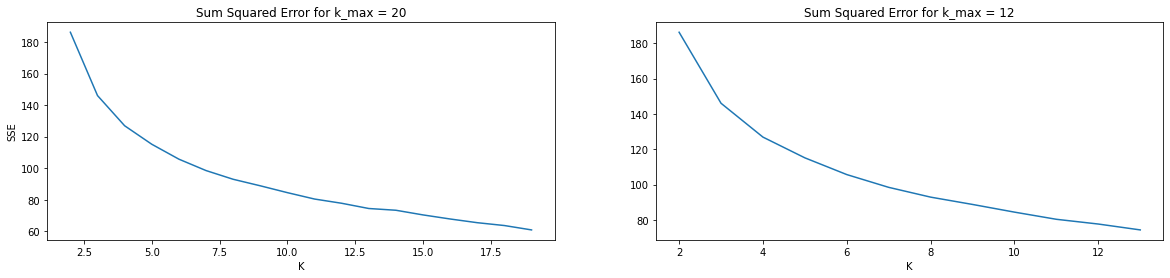

In [10]:
# print the elbow plots
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
visual_max_k = [20, 12]
for i in range(2):
    axs[i].plot(range(2, len(sse[0:visual_max_k[i]]) + 2), list(sse[0:visual_max_k[i]]))
    axs[i].set_title('Sum Squared Error for k_max = ' + str(visual_max_k[i]))
    axs[i].set_xlabel('K')
axs[0].set_ylabel('SSE')

"""axs[1].plot([3], [sse[1]], marker='.', c='r')
axs[1].plot([6], [sse[4]], marker='.', c='r')
axs[1].plot([9], [sse[7]], marker='.', c='r')
axs[1].plot([12], [sse[10]], marker='.', c='r')"""

plt.show()

The graphs above display how the inertia seems to behave less linearly between 3 and 8. This means that 3, 5 or 8 could be potential candidate for the optimal K.

<h6> Average Silhouette Method </h6>
The silhouette score is a indicator of both separation and cohesion among clusters. It is a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. The Silhouette Coefficient is calculated using:

- the mean intra-cluster distance (a): mean distance between the observation and all other data points in the same cluster;
- the mean nearest-cluster distance (b): mean distance between the observation and all other data points of the next nearest cluster.

for each sample. The Silhouette Coefficient for a sample is defined as:

$$\dfrac{(b - a)}{max(a, b)}$$.

In order to maximise the silhouette score (a) need to be small and (b) high.

Here we look for the clusterization with the maximum Silhouette score among those computed by K-means.

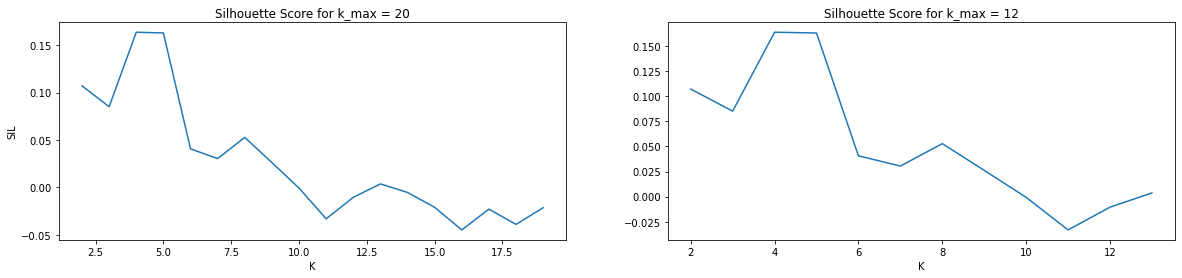

In [11]:
# Create two subplots and unpack the output array immediately
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,4))
visual_max_k = [20, 12]
for i in range(len(visual_max_k)):
    axs[i].plot(range(2, len(silhouette[0:visual_max_k[i]]) + 2), silhouette[0:visual_max_k[i]])
    axs[i].set_title('Silhouette Score for k_max = ' + str(visual_max_k[i]))
    axs[i].set_xlabel('K')
axs[0].set_ylabel('SIL')

"""axs[1].plot([2], [silhouette[0]], marker='.', c='r')
axs[1].plot([3], [silhouette[1]], marker='.', c='r')
axs[1].plot([6], [silhouette[4]], marker='.', c='r')
axs[1].plot([9], [silhouette[7]], marker='.', c='r')
axs[1].plot([12], [silhouette[10]], marker='.', c='r')"""

plt.show()

The Average Silhouette method suggest 2, the point with the maximum score, as the optimal value for the k parameter. Also, the scores for k equals to both 3, 4, 5 and 7 and 12 seems to representes small local maximas.

<h6> Insights from Hierarchical Clustering </h6>
Here we try to identify the optimal number of clusters by analysing the hierarchical clustering performed throught the Ward method. Said method aims at the local optimization of the SSE fuction and therefore it is often used in conjunction with K-means.

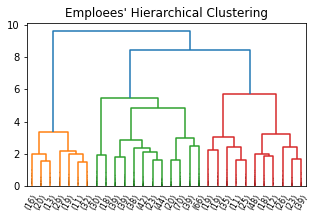

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

gig = plt.figure(figsize=(5, 3))
plt.title("Emploees' Hierarchical Clustering")
plt.axhline(y=80, ls='--', c='red')
dend = dendrogram(linkage(df_norm_minmax, method='ward'), truncate_mode='lastp', p=30, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)
plt.show()

The clustering obtained throught the Ward linkage seems to suggest the presence of two main clusters within the dataset, a smaller one and a  bigger one, further split in two subclusters.
The optimal k to test are k=2, 3, 4, 5, 7.

<h6>Elbow Method and Silhouette Methon comparison </h6>

We prepare a graph comparing the results from the Elbow Method and the analysis of the Silhouette scores.

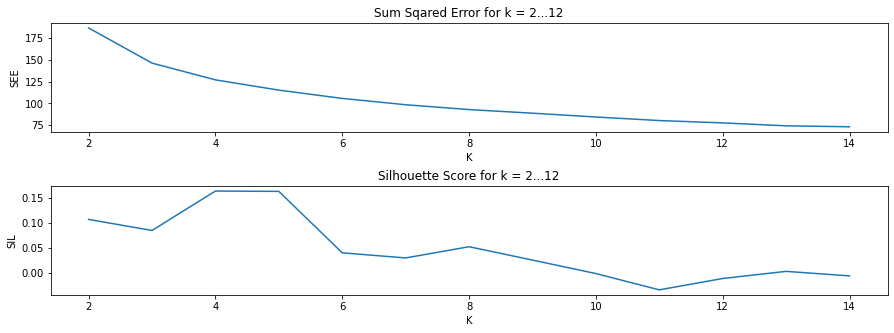

In [13]:
# Create two subplots and unpack the output array immediately
f, axs = plt.subplots(nrows=2, figsize=(15,5))
plt.subplots_adjust(hspace=0.5)
axs[0].plot(range(2, len(sse[0:13]) + 2), sse[0:13])
axs[0].set_title('Sum Sqared Error for k = 2...12')
axs[0].set_ylabel('SEE')
axs[1].set_xlabel('K')
"""axs[0].plot([3], [sse[1]], marker='.', c='r')
axs[0].plot([6], [sse[4]], marker='.', c='r')
axs[0].plot([9], [sse[7]], marker='.', c='r')
axs[0].plot([12], [sse[10]], marker='.', c='r')"""

axs[1].plot(range(2, len(silhouette[0:13]) + 2), silhouette[0:13])
axs[1].set_title('Silhouette Score for k = 2...12')
axs[1].set_ylabel('SIL')
axs[0].set_xlabel('K')
"""axs[1].plot([2], [silhouette[0]], marker='.', c='r')
axs[1].plot([3], [silhouette[1]], marker='.', c='r')
axs[1].plot([6], [silhouette[4]], marker='.', c='r')
axs[1].plot([9], [silhouette[7]], marker='.', c='r')
axs[1].plot([12], [silhouette[10]], marker='.', c='r')"""

plt.show()

According to both methods the values 2, 3, 4 and 5 could be plausible candidates for the role of optimal k. Additionally, the value 2 and 3 stand as the most promising candidates according to their Silhouette score, while for the SSE 3 and 4 are the most outstanding. The former is also supported by the dendrogram previously displayed.

Ultimately, we decide to compute six different clustering, each associated with a potential candidate, and to leave the choice for the best k to after an evaluation process on the results obtained.

In [14]:
Ks = [2, 3, 4, 5, 6, 7, 11]

<h2>Clustering by K-means</h2> 

We perform the clustering for the four values of k previously picked.
For each k we store the information regarding the centroids, the SSE values associated with the clustering and, most importantly, the labels associating each record to its cluster.

In [15]:
centers = []
labels = []
inertia = []
for k in Ks:
    # Initializing K-means parameters
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100) 
    kmeans.fit(df_norm_minmax) # we perform the clusterin for each value of k
    centers.append(minmax_scaler.inverse_transform(kmeans.cluster_centers_)) # we store the coordinates of the centroids
    labels.append(kmeans.labels_) # we store the labels associated with the records
    inertia.append(kmeans.inertia_) # we store the SSE value associated with the clustering

In [16]:
# Saving record's cluster labels
for i in range(len(Ks)):
    df_cleaned['C' + str(Ks[i])] = labels[i]
df_cleaned.head()

,Age,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,...,MonthlyHours,TaxRate,OverallSatisfaction,C2,C3,C4,C5,C6,C7,C11
0,52,0,0,1,0,9,4,2,0,3,...,156.613636,0.387172,2.6,0,0,0,0,3,0,3
1,36,0,0,1,0,1,1,2,0,3,...,157.942308,0.411421,2.8,1,0,0,4,5,5,2
2,25,0,0,0,1,16,3,3,0,3,...,448.055556,0.704402,3.2,0,1,1,1,1,3,7
3,33,0,0,1,0,5,4,2,0,3,...,271.907692,0.841632,2.4,0,1,1,1,4,0,6
4,31,0,0,1,0,9,2,3,1,3,...,106.373333,0.207947,3.2,0,1,2,2,4,2,1


<h2> Clustering results evaluation </h2>
At this point, we are going to use well-known metrics in order to evalueate the clustering obtained with our four versions of k-means. Doing this will grant us a numerical expression of the overall "goodness" of the arrangements of out clusters and, again, it'll guide our choice toward which one is the best number of clusters for the optimal partition of this dataset.

The (internal) evaluation metrics that we are going to compute are:

SSE to measure cohesion
Silhouette Score to measure them both
Davies Bouldin Score to measure separation
Calinski_harabasz_score to measure variance ratio 

In [116]:
def draw_scores(k, silhouette,  separation, variance_ratio, method):
    fig = plt.subplots(figsize=(20, 5))
    fig_dims = (1, 3)
    
    ax = plt.subplot2grid(fig_dims, (0, 0))
    ax.plot(k, silhouette)
    plt.xlabel('K')
    plt.ylabel('SIL')
    plt.title('Silhouette Score for ' + str(method))
    
    ax = plt.subplot2grid(fig_dims, (0, 1))
    ax.plot(k, separation)
    plt.xlabel('K')
    plt.ylabel('SEP')
    plt.title('Separation Score for ' + str(method))
    
    ax = plt.subplot2grid(fig_dims, (0, 2))
    ax.plot(k, variance_ratio)
    plt.xlabel('K')
    plt.ylabel('VRC')
    plt.title('Variance Ratio Criterion Score for ' + str(method))
    
    plt.show()

In [20]:
def get_num_elements_in_each_cluster(cluster):
    tmp_df = df_cleaned.groupby(cluster).count()
    tmp_df2 = df_cleaned[df_cleaned["Attrition"] == 1].groupby(cluster).count()
    
    i = 0
    print("cluster " + str(cluster) + ":")
    for row, row2 in zip(tmp_df.itertuples(), tmp_df2.itertuples()):
        print(i, row.Age, "\tattrition", row2.Age)
        i += 1
    print()

for k in Ks:
    cluster = "C" + str(k)
    get_num_elements_in_each_cluster(cluster)

cluster C2:
0 586 	attrition 127
1 297 	attrition 26

cluster C3:
0 265 	attrition 21
1 471 	attrition 115
2 147 	attrition 17

cluster C4:
0 209 	attrition 15
1 335 	attrition 67
2 194 	attrition 54
3 145 	attrition 17

cluster C5:
0 158 	attrition 10
1 293 	attrition 60
2 181 	attrition 54
3 145 	attrition 17
4 106 	attrition 12

cluster C6:
0 77 	attrition 21
1 178 	attrition 24
2 141 	attrition 17
3 159 	attrition 12
4 224 	attrition 67
5 104 	attrition 12

cluster C7:
0 136 	attrition 12
1 93 	attrition 24
2 208 	attrition 65
3 162 	attrition 19
4 136 	attrition 17
5 72 	attrition 6
6 76 	attrition 10

cluster C11:
0 55 	attrition 4
1 112 	attrition 46
2 52 	attrition 5
3 77 	attrition 9
4 162 	attrition 22
5 87 	attrition 13
6 116 	attrition 26
7 64 	attrition 2
8 62 	attrition 15
9 62 	attrition 8
10 34 	attrition 3



In [21]:
print('Cohesion: ')
for i in range(len(Ks)):
    print('For K = '+ str(Ks[i])+': '+ str(inertia[i]))

Cohesion: 
For K = 2: 186.22399894697452
For K = 3: 146.04738665534464
For K = 4: 126.89987609893888
For K = 5: 115.12021627909232
For K = 6: 105.6966614103104
For K = 7: 98.44030419027835
For K = 11: 81.2513691826792


In [98]:
silhouette = [] 

print('Cohesion and Separation (Silhouette Score): ')
for i in range(len(Ks)):
    s = silhouette_score(df_norm_minmax, labels[i])
    silhouette.append(s)
    print('For K = '+ str(Ks[i])+': '+ str(s))

Cohesion and Separation (Silhouette Score): 
For K = 2: 0.2409991993069464
For K = 3: 0.2561270550227227
For K = 4: 0.21322892899388188
For K = 5: 0.21295273417985872
For K = 6: 0.198184199875763
For K = 7: 0.20069366171175101
For K = 11: 0.19530649784486226


In [112]:
from sklearn.metrics import davies_bouldin_score

separation = []
print('Separation (Davies Bouldin Score): ')
for i in range(len(Ks)):
    d = davies_bouldin_score(df_norm_minmax, labels[i])
    separation.append(d)
    print('For K = '+ str(Ks[i])+': '+ str(d))

Separation (Davies Bouldin Score): 
For K = 2: 1.764160217332556
For K = 3: 1.4479024105354437
For K = 4: 1.4320397587769786
For K = 5: 1.5044323231086185
For K = 6: 1.4911598607692698
For K = 7: 1.414903719816621
For K = 11: 1.5135001289538303


In [111]:
from sklearn.metrics import calinski_harabasz_score

variance_ratio = []
print(' Variance Ratio Criterion  (Calinski Harabasz Score): ')
for i in range(len(Ks)):
    c = calinski_harabasz_score(df_norm_minmax, labels[i])
    variance_ratio.append(c)
    print('For K = '+ str(Ks[i])+': '+ str(c))

 Variance Ratio Criterion  (Calinski Harabasz Score): 
For K = 2: 238.90941406285145
For K = 3: 273.18229776627584
For K = 4: 253.5728949230854
For K = 5: 231.8615874590255
For K = 6: 217.43483100115162
For K = 7: 205.09252024589114
For K = 11: 166.85483548702095


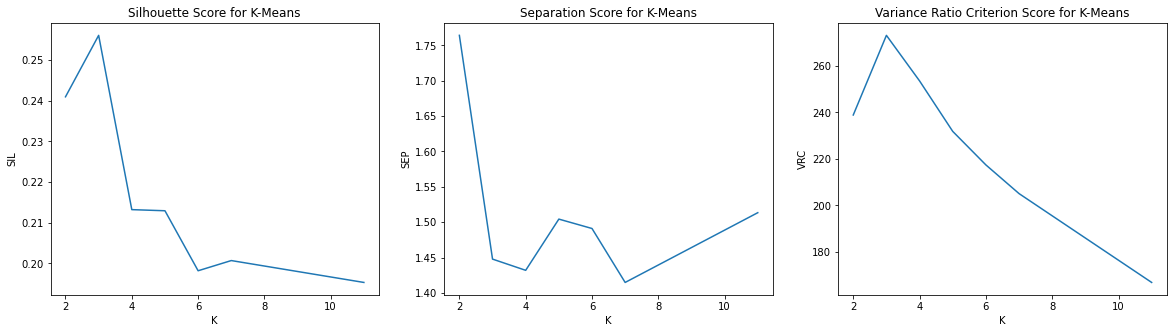

In [117]:
draw_scores(Ks, silhouette,  separation, variance_ratio, "K-Means")

In [154]:
best_k = 3
best_cluster = "C" + str(best_k)  # QUESTO !!! 
best_center_index = 1

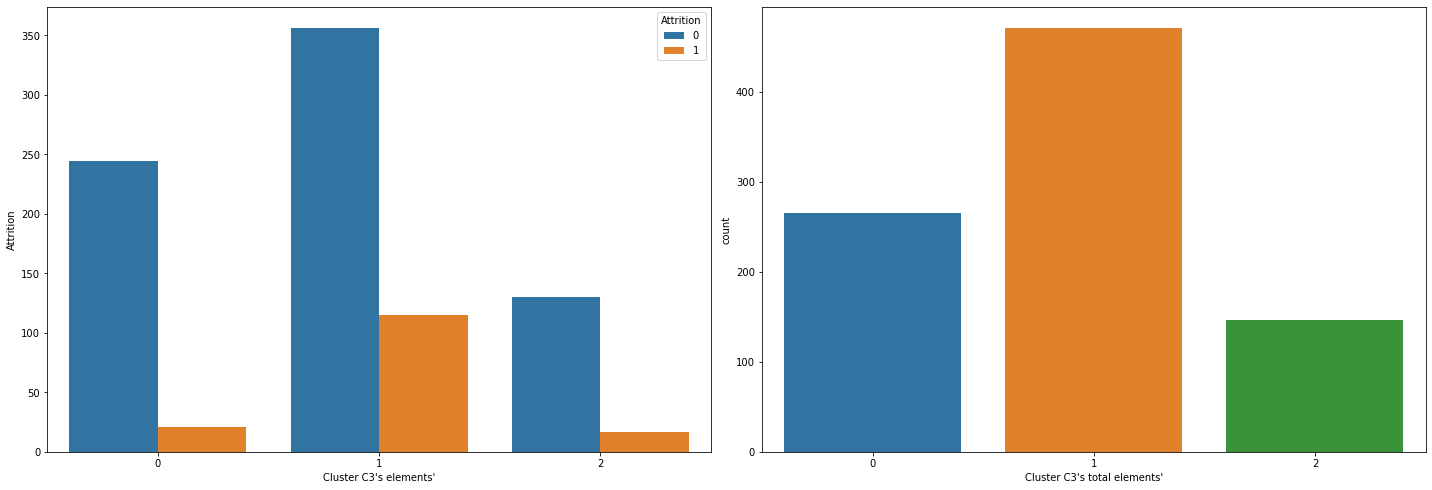

In [31]:
fig = plt.figure(figsize=(20,20))
fig_dims = (3,2)

plt.subplot2grid(fig_dims, (0, 0))
b = sns.countplot(df_cleaned[best_cluster], hue=df_cleaned['Attrition'])
plt.xticks(rotation=0)
b.set_xlabel("Cluster " + str(best_k) + "'s elements'")
b.set_ylabel("Attrition")
b.tick_params()
b.legend_.set_title('Attrition')

tmpDF = df_cleaned[['StockOptionLevel', 'OverTime', best_cluster]]
# Plot completo con la distribuzione dei vari record all'interno dei vari cluster
plt.subplot2grid(fig_dims, (0, 1))
b = sns.countplot(x=best_cluster, data=tmpDF)
b.set_xlabel("Cluster " + str(best_k) + "'s total elements'")
b.set_ylabel("count")

plt.tight_layout()
plt.show() 

<h2> Visualizing the clusters and the centroids </h2>

We now exploit the bidimensional visualization in order to obtain a global view on the clusters and their population. For the sake of providing a meaningful visualization without overburdening the notebook, we build three series scatter plots for specific correlations between pairs of features.

Here you can clearly see the cluster separation and assignment in different colors, and also the centroids in red, so that is is immediate to understand and visualize where the center (i.e. the average value) is located for any cluster.

In [156]:
def draw_centroids(column_name1, column_name2, ax, c_index, best_c):
    a = df_probe.columns.get_loc(column_name1)
    b = df_probe.columns.get_loc(column_name2)
    ax.scatter(df_cleaned[column_name1], df_cleaned[column_name2], c=df_cleaned[best_c], s=200)
    for h in range(0, len(centers[c_index])):
        ax.scatter(centers[c_index][h][a], centers[c_index][h][b], s=200, marker='*', c='r')
    plt.title('Scatter(' + column_name1 + ' , ' + column_name2 + '): K = ' + str(best_c).replace("C", ""))
    plt.xlabel(column_name1)
    plt.ylabel(column_name2)

In [159]:
def draw_only_clustering(column_name1, column_name2, column_name3, ax, best_c):
    
    if column_name3 != "":
        ax.scatter(df_cleaned[column_name1], df_cleaned[column_name2], df_cleaned[column_name3],
                                                                               c=df_cleaned[best_cluster])
    else:
        ax.scatter(df_cleaned[column_name1], df_cleaned[column_name2], c=df_cleaned[best_c], s=100)
    plt.title('Scatter(' + column_name1 + ' , ' + column_name2 + '): K = ' + str(best_c).replace("C", ""))
    plt.xlabel(column_name1)
    plt.ylabel(column_name2)

<h6> k=2</h6>

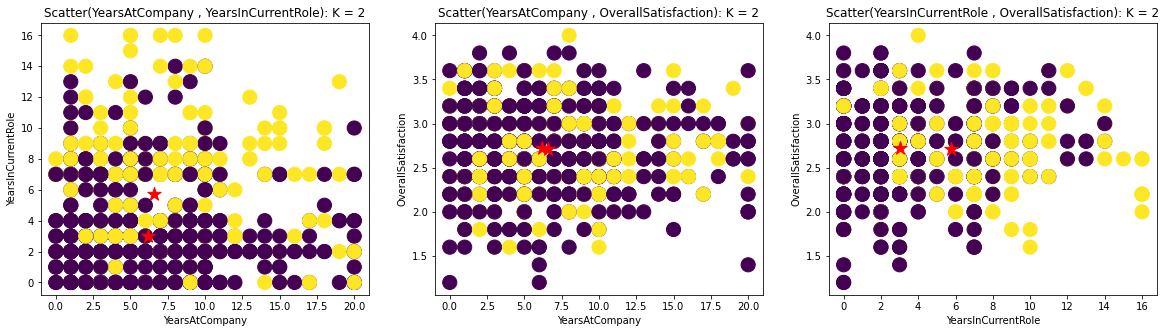

In [163]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("YearsAtCompany", "YearsInCurrentRole",  ax, 0, "C2")

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_centroids("YearsAtCompany", "OverallSatisfaction", ax, 0, "C2")

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_centroids("YearsInCurrentRole", "OverallSatisfaction", ax, 0, "C2")

plt.show()

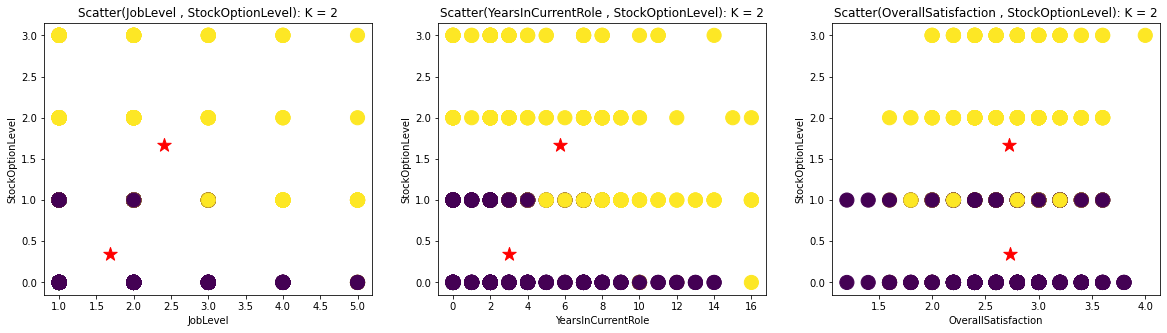

In [164]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("JobLevel", "StockOptionLevel", ax, 0, "C2")

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_centroids("YearsInCurrentRole", "StockOptionLevel", ax, 0, "C2")

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_centroids("OverallSatisfaction", "StockOptionLevel", ax, 0, "C2")

plt.show()

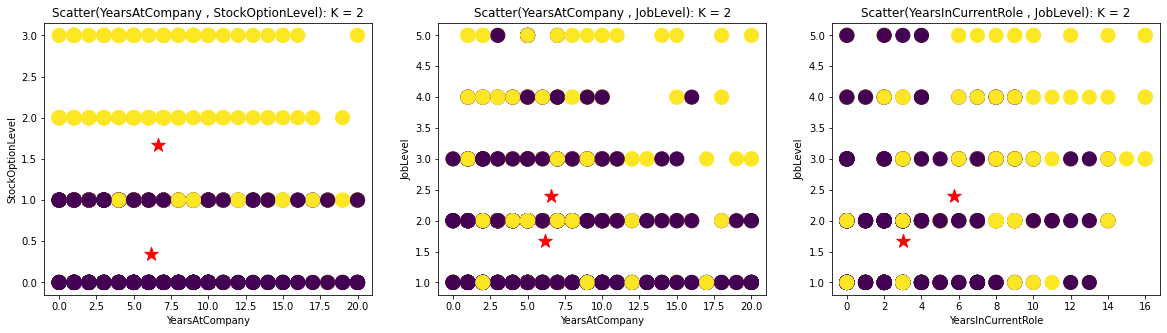

In [166]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("YearsAtCompany", "StockOptionLevel",  ax, 0, "C2")
 
ax = plt.subplot2grid(fig_dims, (0, 1))
draw_centroids("YearsAtCompany", "JobLevel", ax, 0, "C2")

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_centroids("YearsInCurrentRole", "JobLevel", ax, 0, "C2")


plt.show()

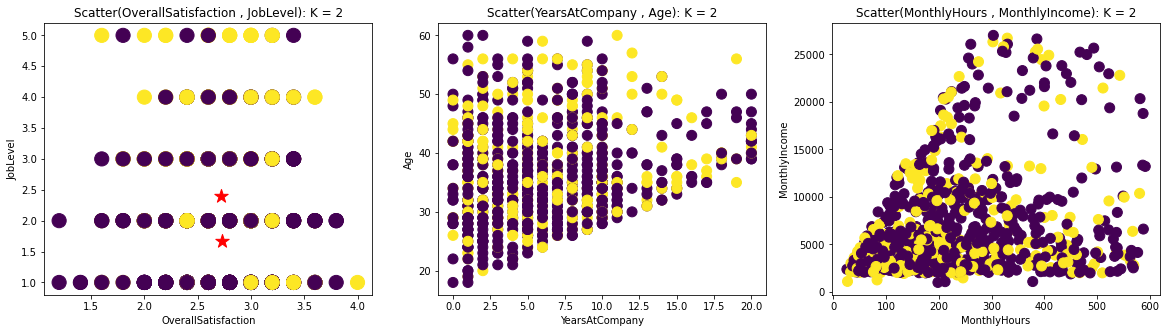

In [168]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("OverallSatisfaction", "JobLevel",  ax, 0, "C2")

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_only_clustering("YearsAtCompany", "Age", "", ax, "C2")

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_only_clustering("MonthlyHours", "MonthlyIncome", "", ax, "C2")

plt.show()

<h6> k=3</h6>

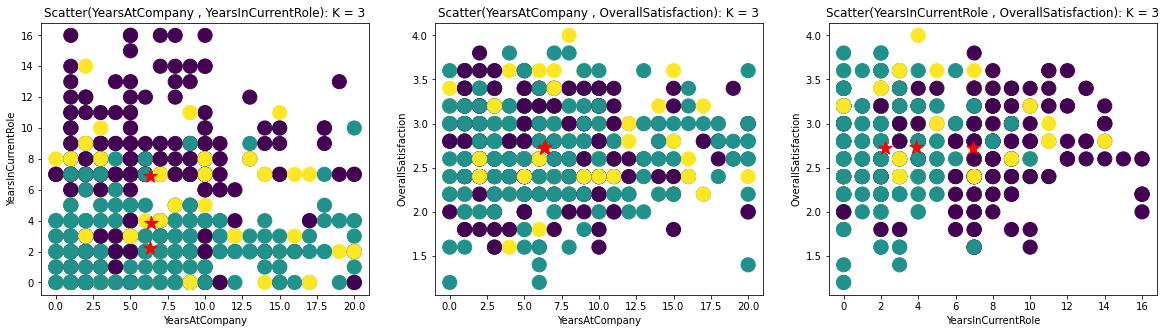

In [158]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("YearsAtCompany", "YearsInCurrentRole",  ax, best_center_index, best_cluster)

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_centroids("YearsAtCompany", "OverallSatisfaction", ax, best_center_index, best_cluster)

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_centroids("YearsInCurrentRole", "OverallSatisfaction", ax, best_center_index, best_cluster)

plt.show()

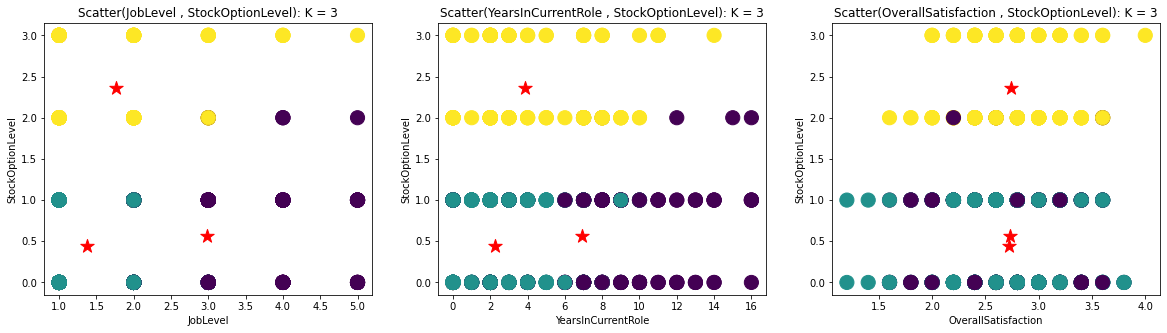

In [160]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("JobLevel", "StockOptionLevel", ax, best_center_index, best_cluster)

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_centroids("YearsInCurrentRole", "StockOptionLevel", ax, best_center_index, best_cluster)

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_centroids("OverallSatisfaction", "StockOptionLevel", ax, best_center_index, best_cluster)

plt.show()

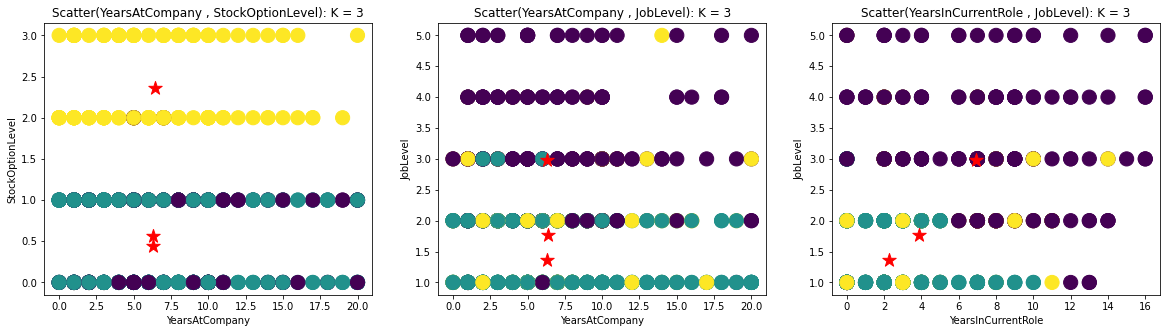

In [162]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("YearsAtCompany", "StockOptionLevel",  ax, best_center_index, best_cluster)
 
ax = plt.subplot2grid(fig_dims, (0, 1))
draw_centroids("YearsAtCompany", "JobLevel", ax, best_center_index, best_cluster)

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_centroids("YearsInCurrentRole", "JobLevel", ax, best_center_index, best_cluster)


plt.show()

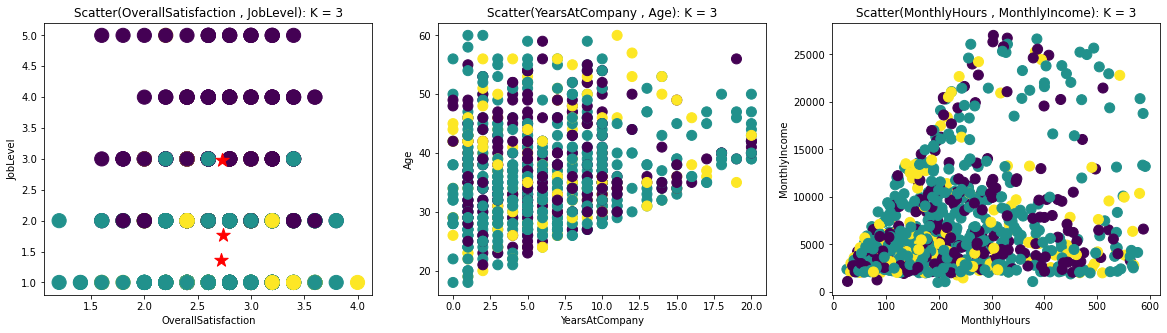

In [161]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("OverallSatisfaction", "JobLevel",  ax, best_center_index, best_cluster)

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_only_clustering("YearsAtCompany", "Age", "", ax, best_cluster)

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_only_clustering("MonthlyHours", "MonthlyIncome", "", ax, best_cluster)

plt.show()

<h6> k=4</h6>

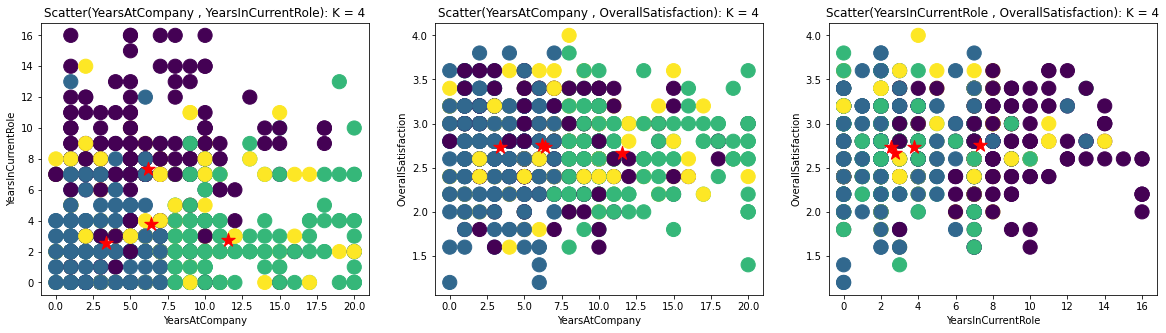

In [173]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("YearsAtCompany", "YearsInCurrentRole",  ax, 2, "C4")

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_centroids("YearsAtCompany", "OverallSatisfaction", ax, 2, "C4")

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_centroids("YearsInCurrentRole", "OverallSatisfaction", ax, 2, "C4")

plt.show()

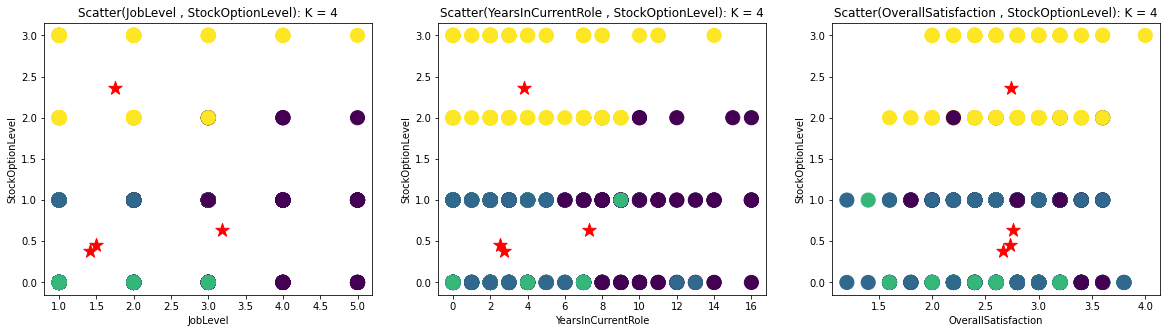

In [172]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("JobLevel", "StockOptionLevel", ax, 2, "C4")

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_centroids("YearsInCurrentRole", "StockOptionLevel", ax, 2, "C4")

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_centroids("OverallSatisfaction", "StockOptionLevel", ax, 2, "C4")

plt.show()

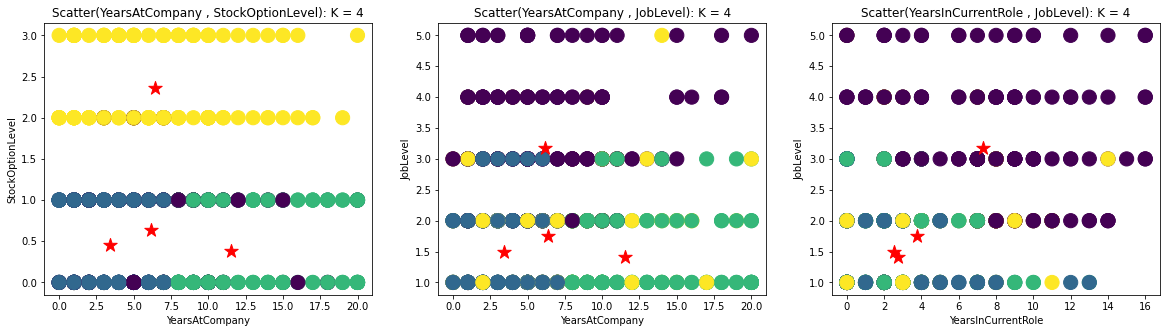

In [171]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("YearsAtCompany", "StockOptionLevel",  ax, 2, "C4")
 
ax = plt.subplot2grid(fig_dims, (0, 1))
draw_centroids("YearsAtCompany", "JobLevel", ax, 2, "C4")

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_centroids("YearsInCurrentRole", "JobLevel", ax, 2, "C4")


plt.show()

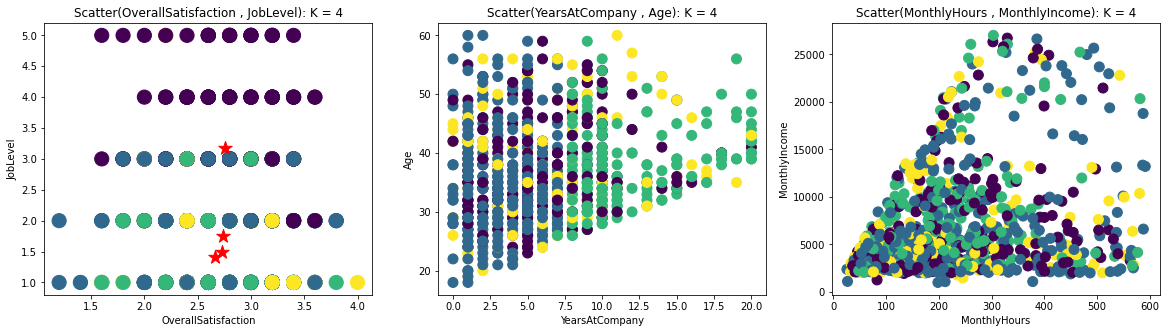

In [169]:
curr_column = "JobRole"
fig = plt.subplots(figsize=(20, 5))
fig_dims = (1, 3)

ax = plt.subplot2grid(fig_dims, (0, 0))
draw_centroids("OverallSatisfaction", "JobLevel",  ax, 2, "C4")

ax = plt.subplot2grid(fig_dims, (0, 1))
draw_only_clustering("YearsAtCompany", "Age", "", ax, "C4")

ax = plt.subplot2grid(fig_dims, (0, 2))
draw_only_clustering("MonthlyHours", "MonthlyIncome", "", ax, "C4")

plt.show()

<h6> Centroids visualisation and comparison among different k </h6>

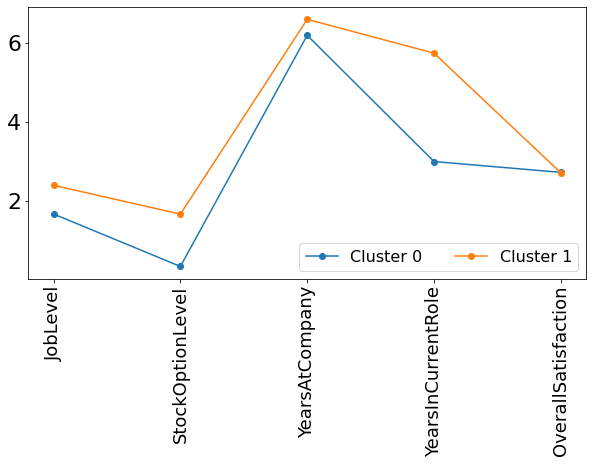

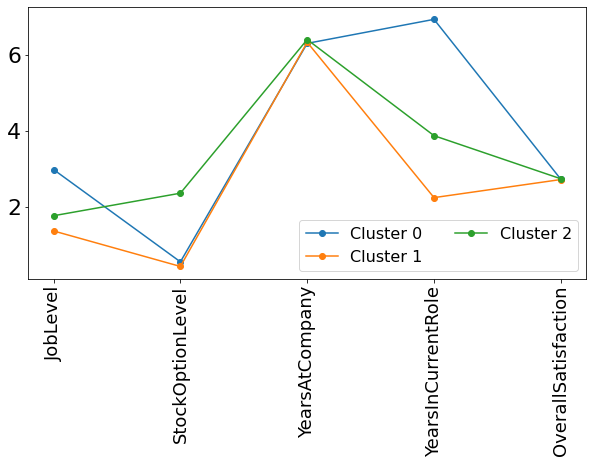

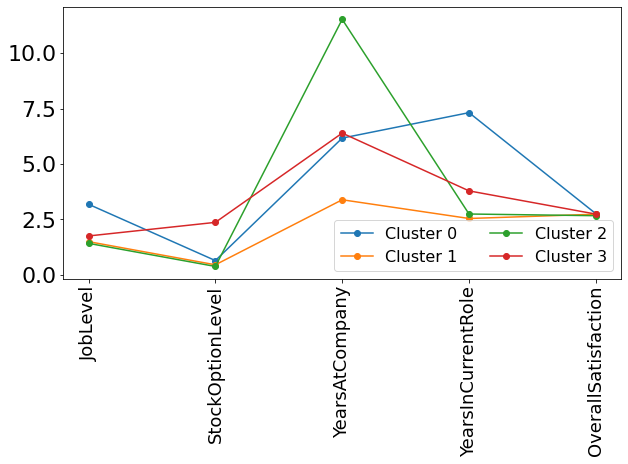

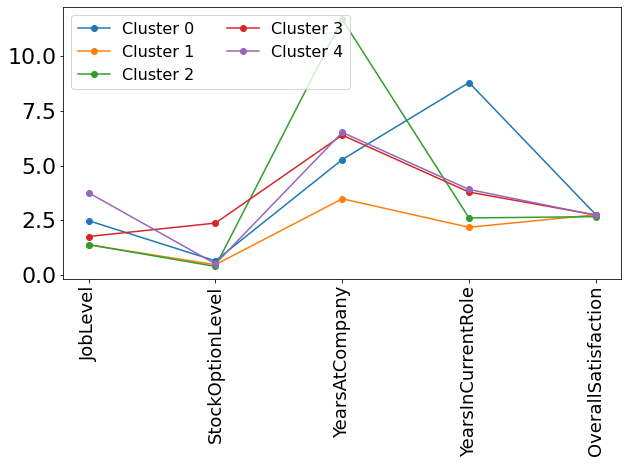

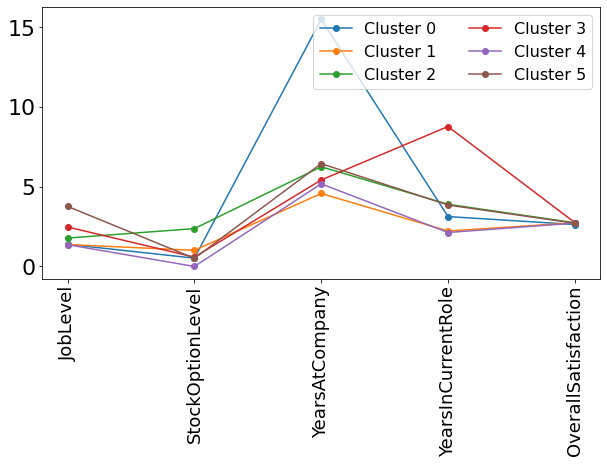

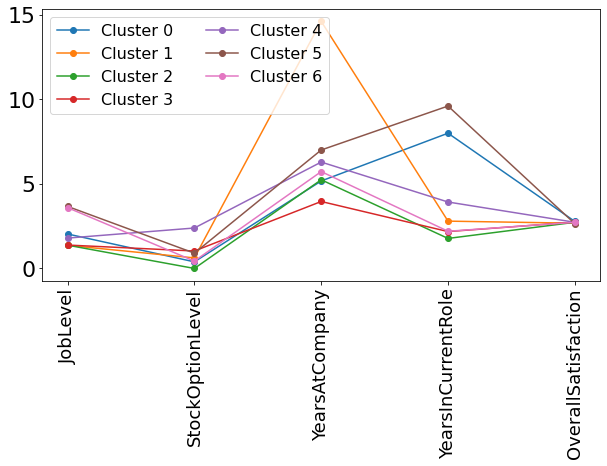

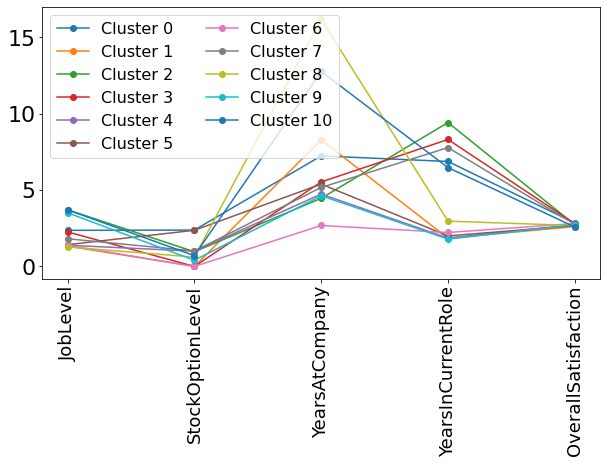

In [187]:
for j in range(0, len(Ks)):
    plt.figure(figsize=(10, 5))
    for i in range(0, Ks[j]):
        plt.plot(centers[j][i], marker='o', label='Cluster %s' % i)

    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.xticks(range(0, len(df_probe.columns)), df_probe.columns, fontsize=18)
    plt.legend(fontsize=16, ncol=2)
    plt.xticks(rotation=90)
    plt.show()